# pandas - Python data analysis library

**Author: Trevor Faske  
Modified: 02/15/2022**

pandas is a must learn tool for data science. It is a powerful python package and swiss army knife for all data analysis. "The name is derived from the term 'panel data', an econometrics term for data sets that include observations over multiple time periods for the same individuals. Also a play on the phrase 'Python data analysis.'" - wikipedia

pandas works with the data structure called **DataFrame** (same as in R). This consists of a matrix with rows and columns and will very similar to an excel spreadsheet or csv file. pandas allows you to easily manipulate, filter, summarize, and merge data for downstream processing. pandas is part of the SciPy (https://www.scipy.org/) ecosystem so works great for plotting and data analysis. 

## Resources

- https://github.com/jvns/pandas-cookbook
- https://www.w3schools.com/python/ (great NumPy intro)
- https://pandas.pydata.org/docs/getting_started/tutorials.html (community tutorials)
- https://pandas.pydata.org/docs/user_guide/index.html

## Installing libraries

Python is extremely efficient and only has a few commands loaded and installed from the beginning. There are libraries we will have to install and import as needed to use. 

Everyone should have pip3 or conda available and these commands will be used to install needed libraries from the terminal. 

**If using pip3**:  

`$ pip3 install numpy`   
`$ pip3 install pandas`
    
You might get a permissions error. If so, install like:  
`$ pip3 install --user pandas`

**If using conda**:  

`$ conda install -c anaconda numpy`  
`$ conda install -c anaconda pandas`


## Importing libraries

Python only has a few base commands and is extremely effecient. Libraries must be imported before use to make the commands available. There is a few ways to import libraries by creating aliases or only accessing paticular functions within libraries. 

Basic import: 

`import numpy`  
`import pandas`  


Examples of more common ways of importing:  

`import numpy,pandas` #import multiple libraries in single line  
`import numpy as np` #import package as alias  
`from pandas import DataFrame` #import only specific function from library

Common aliases you will see when searching issues:  

`import numpy as np`  
`import pandas as pd`

## Getting started with NumPy

#### Resource: https://www.w3schools.com/python/numpy_intro.asp

NumPy is a popular array – processing package of Python that also does a lot of mathmatical processes. Everything is array/matrix based and works faster than a list. pandas uses many of this same syntax so might be useful to know a few commands!

### ndarrays

import numpy

In [1]:
import numpy as np 

#### create 1-D array

In [2]:
d1 = np.array([1,3,5,2,4,6])
print(d1)
type(d1)

[1 3 5 2 4 6]


numpy.ndarray

#### create 2-D array

In [3]:
d2 = np.array([[1,3,5],[2,4,6]])
print(d2)

[[1 3 5]
 [2 4 6]]


#### get dimensions and total size

In [4]:
print(d2.shape) #rows, columns
print(d2.size) 

(2, 3)
6


### Accessing and indexing arrays work very similar to lists but with added dimension. Very similar to R indexing 

array[row,column] #REMEMBER starts at 0

In [5]:
# 2nd row, 1st column 
print(d2[1,0]) 

# 1st row, 3rd column
print(d2[0,2])

2
5


#### Slicing works very similarly to lists

In [6]:
#extract first 2 elements of the 2nd row
print(d2[1,:2])

[2 4]


### arange and reshape array format

In [7]:
d1 = np.array([1,3,5,2,4,6])
print(d1)
d1.reshape(2,3)

[1 3 5 2 4 6]


array([[1, 3, 5],
       [2, 4, 6]])

In [8]:
d2.reshape(1,6)  

array([[1, 3, 5, 2, 4, 6]])

#### create 1D array 0-9

In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### array 0 to 50 by 5 (start,stop,step)

In [10]:
np.arange(0,51,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

### Random number generator

very useful for permutation techniques or simulating data

import random from numpy

In [11]:
from numpy import random

#### Generate a random float from 0 to 1

In [199]:
random.rand()

0.9067011502597366

#### generate 5 random float from 0 to 1

In [200]:
random.rand(5)

array([0.59207941, 0.04192336, 0.54585234, 0.90507268, 0.80355514])

#### generate random integer between 0-99

In [203]:
random.randint(100)

39

#### generate 7 random integer between 0-99

In [204]:
random.randint(100, size = 7)

array([89,  2, 69, 35, 31, 44, 40])

#### generate 2D array random integer between 0-99

In [205]:
random.randint(100, size=(2,3))

array([[ 5, 61, 26],
       [ 1,  9, 59]])

### Choose or randomly sample list/array

#### sample from list

In [210]:
random.choice([3, 5, 7, 9])

3

#### sample 4 elements from list 

In [212]:
random.choice([3, 5, 7, 9],size=(3,4))

array([[5, 5, 9, 9],
       [5, 7, 9, 7],
       [5, 7, 9, 5]])

### Math (https://numpy.org/doc/stable/reference/routines.math.html)

#### generate 100 random numbers from 1 to 1000 and get length, max, min, mean

In [213]:
x = random.randint(1000,size=100)

print(len(x))
print(x.max())
print(x.min())
print(x.mean())

100
995
10
549.76


## Getting started with pandas - finally to the good stuff! 

#### side note: 

Nice thing about jupyter notebooks is it accepts linux commands, just as the terminal

In [22]:
### Change to pandas working directory
pandas_dir = '/Users/trevorfaske/g/Classes/DataScience/Data_Science_For_Biology_II/Part.3.PythonProgramming/'

In [25]:
cd $pandas_dir

/Users/trevorfaske/Desktop/Classes/BIOL792/F21_BIOL792_coursepage/week12_python7


In [3]:
!mkdir new_dir

In [4]:
!rmdir new_dir

### Read and write files (using DataFrame) 

Make sure you have **states_covid.csv** in your pandas directory from above.  

Data downloaded from: https://github.com/COVID19Tracking/covid-tracking-data (data stopped updating March, 2021)  

**PATH**: You need your path to be correct to load files. Go to directory for day 5 in your terminal and type `pwd`. Copy this path in front of **states_covid.csv**

In [26]:
import pandas as pd

state_covid_df = pd.read_csv('states_covid.csv') #read in csv
state_covid_df.head() #views the top 5 lines

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-23,AK,290.0,NaN,0,NaN,1260.0,1260.0,38.0,9,...,1653425.0,4640,NaN,NaN,NaN,NaN,NaN,0,1653425.0,4640
1,2021-02-23,AL,9660.0,7575.0,68,2085.0,45250.0,45250.0,762.0,122,...,2265086.0,4825,NaN,NaN,115256.0,NaN,2265086.0,4825,NaN,0
2,2021-02-23,AR,5377.0,4321.0,14,1056.0,14617.0,14617.0,545.0,47,...,2609837.0,4779,NaN,NaN,NaN,436309.0,NaN,0,2609837.0,4779
3,2021-02-23,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-02-23,AZ,15650.0,13821.0,148,1829.0,57072.0,57072.0,1515.0,78,...,7478323.0,19439,435091.0,NaN,NaN,NaN,3709365.0,6212,7478323.0,19439


In [6]:
state_covid_df.shape #row, column length

(20108, 41)

In [7]:
state_covid_df.columns #views the column names

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

While the above example is very straight forward with a clean csv file, **pd.read_csv()** is a very powerful tool for reading/parsing complicated data. For more information of all the commands it has, visit here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. Otherwise, google is your best friend. Any issue you have, someone has figured it out already. 

One common issue with all data formats are *Dates*. Pandas has a way to read dates in without much headache and nice features for doing things with dates. You can also only select various columns, rename headers, remove headers, change what characters you want to be recognized as NAs, etc.

Below is an example of some of the things you can do. 

In [16]:
state_covid_sub_df = pd.read_csv('states_covid.csv',usecols=['date','state','death','positive','negative','totalTestResults'],parse_dates=['date'],infer_datetime_format=True)
state_covid_sub_df.head()

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0


#### check and make sure dtypes are right (dates specifically)

In [17]:
state_covid_sub_df.dtypes

date                datetime64[ns]
state                       object
death                      float64
negative                   float64
positive                   float64
totalTestResults           float64
dtype: object

### write DataFrame to outfile 
(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

**note:** make sure you provide the path or are in the working directory you want

In [27]:
outfile_path = pandas_dir + 'state_covid_sub.csv'
#outfile_path = os.path.join(pandas_dir,'state_covid_sub.csv')
state_covid_sub_df.to_csv(path_or_buf=outfile_path,index=False)

## Manipulate DataFrame 

While read_csv is a powerful tool, we are going to subset, rename, change dtypes, and filter on our own just as a practice

In [28]:
state_covid_df = pd.read_csv('states_covid.csv')

#### Select only columns date, state, death, negative, postive, totalTestResults 

In [29]:
new_covid_df = state_covid_df[['date','state','death','positive','negative','totalTestResults']]
new_covid_df.head() 

,date,state,death,positive,negative,totalTestResults
0,2021-02-23,AK,290.0,55560.0,NaN,1653425.0
1,2021-02-23,AL,9660.0,488973.0,1882180.0,2265086.0
2,2021-02-23,AR,5377.0,316593.0,2359571.0,2609837.0
3,2021-02-23,AS,0.0,0.0,2140.0,2140.0
4,2021-02-23,AZ,15650.0,810658.0,2953210.0,7478323.0


#### two ways to change column names totalTestResults to total 
first changes all colums:  
`new_covid_df.columns = ['date','state','death','positive','negative','total']`  

Second code below:  
changes only selected column  
axis = (0 = rows, 1 = columns)  
inplace=True replaces the current DataFrame, same as (df = df.DOSOMETHING) 

In [30]:
new_covid_df.rename({'totalTestResults':'total'},axis=1,inplace=True)

/Users/trevorfaske/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [31]:
new_covid_df.head()

,date,state,death,positive,negative,total
0,2021-02-23,AK,290.0,55560.0,NaN,1653425.0
1,2021-02-23,AL,9660.0,488973.0,1882180.0,2265086.0
2,2021-02-23,AR,5377.0,316593.0,2359571.0,2609837.0
3,2021-02-23,AS,0.0,0.0,2140.0,2140.0
4,2021-02-23,AZ,15650.0,810658.0,2953210.0,7478323.0


#### two ways to reorder columns
`new_covid_df = new_covid_df[['date','state','total','negative','positive','death']]`  
`new_covid_df = new_covid_df.iloc[:,[0,1,5,4,3,2]]` #iloc is how you access df like a matrix

In [32]:
new_covid_df.iloc[2,3]

316593.0

In [33]:
new_covid_df = new_covid_df[['date','state','total','negative','positive','death']]

#### add a column (positivity rate)
`new_covid_df['rate'] = new_covid_df.positive / new_covid_df.total` #alternate way

In [35]:
new_covid_df['rate'] = new_covid_df['positive'] / new_covid_df['total']

#### Date manipulation
There's lots of crazy stuff you can do with dates, not going into it too much but just letting you know you can do it and something worth looking into

In [36]:
new_covid_df["date"]= pd.to_datetime(new_covid_df["date"],yearfirst=True) 
new_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20108 entries, 0 to 20107
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      20108 non-null  datetime64[ns]
 1   state     20108 non-null  object        
 2   total     20006 non-null  float64       
 3   negative  15640 non-null  float64       
 4   positive  19912 non-null  float64       
 5   death     19230 non-null  float64       
 6   rate      19824 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.1+ MB


#### add a column for day of year/julian date

In [37]:
new_covid_df['dayofyear'] = new_covid_df['date'].dt.dayofyear
new_covid_df.head()

,date,state,total,negative,positive,death,rate,dayofyear
0,2021-02-23,AK,1653425.0,NaN,55560.0,290.0,0.033603,54
1,2021-02-23,AL,2265086.0,1882180.0,488973.0,9660.0,0.215874,54
2,2021-02-23,AR,2609837.0,2359571.0,316593.0,5377.0,0.121308,54
3,2021-02-23,AS,2140.0,2140.0,0.0,0.0,0.000000,54
4,2021-02-23,AZ,7478323.0,2953210.0,810658.0,15650.0,0.108401,54


#### subsetting/filtering data
subset or filter on multiple columns and data types (numeric or string)

First, we'll subset on Nevada only and peak in to what it is doing

In [38]:
new_covid_df.state == 'NV'

0        False
1        False
2        False
3        False
4        False
         ...  
20103    False
20104    False
20105    False
20106    False
20107    False
Name: state, Length: 20108, dtype: bool

You can't really see where but it is outputtig a list of boolean (True,False) in the order they are found. If you put this statement as an index, it will keep only the Trues

**subsetting NV only**

In [39]:
NV_covid_df = new_covid_df[new_covid_df.state == 'NV']
NV_covid_df.head()

,date,state,total,negative,positive,death,rate,dayofyear
36,2021-02-23,NV,2678249.0,1106648.0,291543.0,4903.0,0.108856,54
92,2021-02-22,NV,2667800.0,1103209.0,291145.0,4882.0,0.109133,53
148,2021-02-21,NV,2662867.0,1101946.0,290972.0,4872.0,0.109270,52
204,2021-02-20,NV,2656833.0,1100139.0,290671.0,4868.0,0.109405,51
260,2021-02-19,NV,2650086.0,1098605.0,290300.0,4831.0,0.109544,50


Let's do one more filtering on states and something else numeric

| means or   
& means and

In [40]:
new_covid_df[(new_covid_df.state == 'NV') & (new_covid_df.rate > 0.10)]

,date,state,total,negative,positive,death,rate,dayofyear
36,2021-02-23,NV,2678249.0,1106648.0,291543.0,4903.0,0.108856,54
92,2021-02-22,NV,2667800.0,1103209.0,291145.0,4882.0,0.109133,53
148,2021-02-21,NV,2662867.0,1101946.0,290972.0,4872.0,0.109270,52
204,2021-02-20,NV,2656833.0,1100139.0,290671.0,4868.0,0.109405,51
260,2021-02-19,NV,2650086.0,1098605.0,290300.0,4831.0,0.109544,50
...,...,...,...,...,...,...,...,...
17508,2020-04-17,NV,33881.0,26238.0,3524.0,162.0,0.104011,108
17564,2020-04-16,NV,32746.0,25130.0,3321.0,158.0,0.101417,107
17620,2020-04-15,NV,31276.0,24444.0,3211.0,150.0,0.102667,106
17676,2020-04-14,NV,30241.0,23573.0,3088.0,141.0,0.102113,105


df.query() is another way that might look a little cleaner for more complicated filtering  
be careful with syntax of quotations 

In [41]:
new_covid_df.query("state == 'NV' & rate > 0.10")

,date,state,total,negative,positive,death,rate,dayofyear
36,2021-02-23,NV,2678249.0,1106648.0,291543.0,4903.0,0.108856,54
92,2021-02-22,NV,2667800.0,1103209.0,291145.0,4882.0,0.109133,53
148,2021-02-21,NV,2662867.0,1101946.0,290972.0,4872.0,0.109270,52
204,2021-02-20,NV,2656833.0,1100139.0,290671.0,4868.0,0.109405,51
260,2021-02-19,NV,2650086.0,1098605.0,290300.0,4831.0,0.109544,50
...,...,...,...,...,...,...,...,...
17508,2020-04-17,NV,33881.0,26238.0,3524.0,162.0,0.104011,108
17564,2020-04-16,NV,32746.0,25130.0,3321.0,158.0,0.101417,107
17620,2020-04-15,NV,31276.0,24444.0,3211.0,150.0,0.102667,106
17676,2020-04-14,NV,30241.0,23573.0,3088.0,141.0,0.102113,105


### Sort dataframe 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

**sort and select top 5 positive days**

In [45]:
#new_covid_df = new_covid_df.sort_values('positive',ascending=False,inplace=False)
new_covid_df.sort_values('positive',ascending=False,inplace=True)
new_covid_df.head()

,date,state,total,negative,positive,death,rate,dayofyear
5,2021-02-23,CA,47513367.0,NaN,3450058.0,49563.0,0.072612,54
61,2021-02-22,CA,47320802.0,NaN,3446611.0,49338.0,0.072835,53
117,2021-02-21,CA,47043348.0,NaN,3441946.0,49105.0,0.073165,52
173,2021-02-20,CA,46813876.0,NaN,3435186.0,48825.0,0.073380,51
229,2021-02-19,CA,46621654.0,NaN,3428518.0,48344.0,0.073539,50


## Creating a DataFrame

There are a few different ways to create a DataFrame from scratch or non-csv/excel formatted data

### DataFrame from NumPy  
ndarray formats translate nicely into DataFrames. Let's generate some fake data using the random function in NumPy to demonstrate. Say this made up data is different sites and persons ratings (0-5) of 8 GREAT Nicholas Cage movies. 

In [49]:
###generate a random array (8 rows, 6 columns) with values ranging 0-4  
movieRank_np = random.randint(5, size=(8,6))

Lets make up some column names for this data  

In [50]:
col_names = ['RottenTomatoes','IMBD','MovieCritic','Julie','Trevor','Jahner']
movieRank_df = pd.DataFrame(movieRank_np,columns=col_names)

Lets add a column for movie titles and make them the index as well

In [52]:
movies = ['FaceOff','RaisingArizona','WeatherMan','WickerMan','Adaptation','Gone60Seconds','ConAir','TheRock']  
movieRank_df['movie'] = movies  
movieRank_df.index = movies
movieRank_df

,RottenTomatoes,IMBD,MovieCritic,Julie,Trevor,Jahner,movie
FaceOff,3,3,4,3,0,2,FaceOff
RaisingArizona,4,1,4,4,0,0,RaisingArizona
WeatherMan,4,0,4,4,4,4,WeatherMan
WickerMan,1,1,4,0,0,4,WickerMan
Adaptation,3,2,3,0,1,2,Adaptation
Gone60Seconds,3,3,3,3,1,4,Gone60Seconds
ConAir,4,4,2,2,0,3,ConAir
TheRock,2,0,4,1,1,3,TheRock


In [56]:
movieRank_df.mean(axis=0) #mean rank per movie, axis = [row = 0 ,column = 1]

RottenTomatoes    3.000
IMBD              1.750
MovieCritic       3.500
Julie             2.125
Trevor            0.875
Jahner            2.750
dtype: float64

We all know these numbers are of course wrong because there's no rank below a 5 that should be given, but just an example

## Summarizing DataFrame

https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

You will need **Bloom_etal_2018_Reduced_Dataset.csv** from Homework 3 python  

Summarizing data is important for figures, statistics, and general reporting

make sure you're in the right directory and have the correct csv

In [57]:
cd $pandas_dir

/Users/trevorfaske/Desktop/Classes/BIOL792/F21_BIOL792_coursepage/week12_python7


In [58]:
bloom_df = pd.read_csv('Bloom_etal_2018_Reduced_Dataset.csv')
print(bloom_df.shape)
print(bloom_df.head())

(50, 4)
                   taxa  logbodysize  trophic_position         Reg
0        Alosa_alabamae     1.707570          0.431364  diadromous
1           Alosa_alosa     1.778151          0.556303  diadromous
2          Alosa_fallax     1.778151          0.556303  diadromous
3       Alosa_mediocris     1.778151          0.612784  diadromous
4  Alosa_pseudoharengus     1.602060          0.544068  diadromous


Let's check out how many options there are for the *Reg* column

In [61]:
bloom_df['Reg'].unique()

array(['diadromous', 'non-diadromous'], dtype=object)

Now lets get some summary stats for *logbodysize* and *tropic_position* based on being diadromous or non-diadromous

In [62]:
bloom_reg_df = bloom_df.groupby('Reg',as_index=True).agg(['mean','count'])
bloom_reg_df

logbodysize       trophic_position      
                      mean count             mean count
Reg                                                    
diadromous        1.507245    15         0.500777    15
non-diadromous    0.842018    35         0.500720    35

In [63]:
bloom_reg_df.index

Index(['diadromous', 'non-diadromous'], dtype='object', name='Reg')

**WARNING:** as you can see, this produced the desired result but the column names are now stacked and have what is known as a *MultiIndex* column name and needs to be flattened. You only need to worry about this if summarizing over more than one column

In [64]:
bloom_reg_df.columns

MultiIndex([(     'logbodysize',  'mean'),
            (     'logbodysize', 'count'),
            ('trophic_position',  'mean'),
            ('trophic_position', 'count')],
           )

Let's join the MultiIndex to a single column index like we are used to.

In [65]:
bloom_reg_df.columns = bloom_reg_df.columns.map('_'.join)
bloom_reg_df

,logbodysize_mean,logbodysize_count,trophic_position_mean,trophic_position_count
Reg,,,,
diadromous,1.507245,15,0.500777,15
non-diadromous,0.842018,35,0.500720,35


In [66]:
x = bloom_reg_df['logbodysize_count']
print(x)
print(x)

Reg
diadromous        15
non-diadromous    35
Name: logbodysize_count, dtype: int64
Reg
diadromous        15
non-diadromous    35
Name: logbodysize_count, dtype: int64


## lastly, couple other useful (maybe) things

### matplotlib

Not going to go too much into this but just so you know it exists. matplotlib is the most common plotting function in python I think. There are many others though! matplotlib is nice cause it's in the SciPy family so works nicely with pandas and NumPy and other things. Also allows you to integrate ggplot and seaborn if you would like. 

Simple figures with Covid data. Read in the data again, run through same code to get only NV data

In [67]:
state_covid_sub_df = pd.read_csv('states_covid.csv',usecols=['date','state','death','positive','negative','totalTestResults'],parse_dates=['date'],infer_datetime_format=True,index_col=None)
state_covid_sub_df.head()

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0


Make sure you index as date. Plot will automatically recogize it for axis. 

In [68]:
NV_covid_df = state_covid_sub_df[state_covid_sub_df.state == 'NV']
NV_covid_df.index = NV_covid_df['date']
NV_covid_df.head()

,date,state,death,negative,positive,totalTestResults
date,,,,,,
2021-02-23,2021-02-23,NV,4903.0,1106648.0,291543.0,2678249.0
2021-02-22,2021-02-22,NV,4882.0,1103209.0,291145.0,2667800.0
2021-02-21,2021-02-21,NV,4872.0,1101946.0,290972.0,2662867.0
2021-02-20,2021-02-20,NV,4868.0,1100139.0,290671.0,2656833.0
2021-02-19,2021-02-19,NV,4831.0,1098605.0,290300.0,2650086.0


Load matplotlib.pyplot, plot death over time

<AxesSubplot:xlabel='date'>

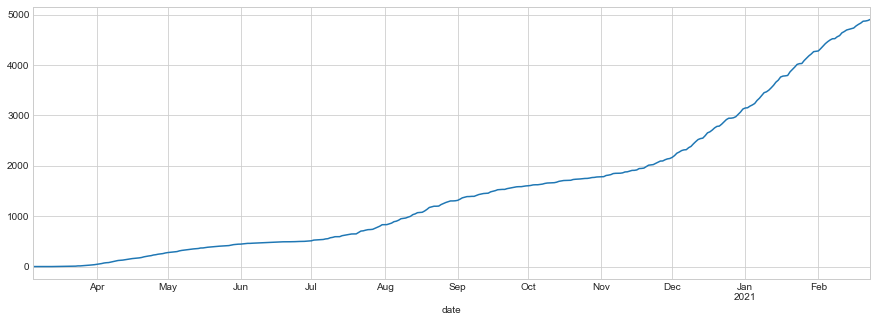

In [71]:
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 5)

#### plot deaths over time ####
NV_covid_df.death.plot()

Remember that python has great built in date attributes. Plot deaths by day and find the days with the most deaths 

,death,negative,positive,totalTestResults
date,,,,
Tuesday,79269.0,26076775.0,4805720.0,50582871.0


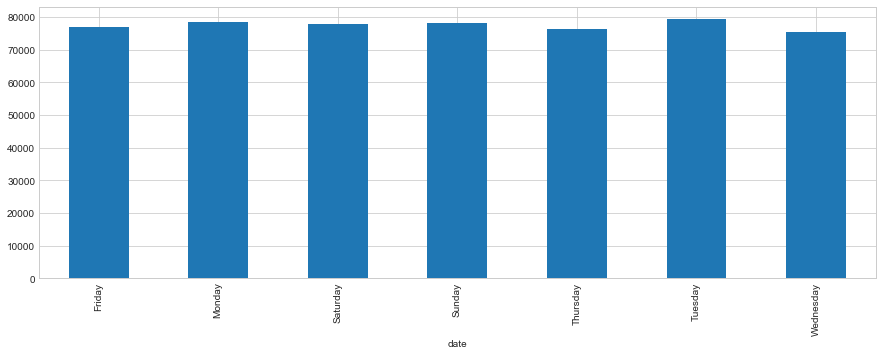

In [72]:
#### deaths by day of the week ####
weekday_counts = NV_covid_df.groupby(NV_covid_df['date'].dt.day_name()).aggregate(sum)
weekday_counts

weekday_counts.death.plot(kind='bar')

weekday_counts[weekday_counts.death == weekday_counts.death.max()]

Days with most deaths are **Tuesday**. Anyone know why? "most places are closed on the weekend, many counts are reports happen on monday" 

### Other useful libraries

- BioPython / SeqIO (molecular biology)
- scikit-learn (statistics and machine learning)
- TenserFlow (Deep Learning)
- BeautifulSoup (Scraping HTML)
- seaborn (extension of matplotlib)
- plotly (more ploting)
- iPython (notebooks / will go over in Julie's course)
- r2py (run R script within python)
- literally anything you can think of, a library exists for it


# ta-daaaa, you're a data science wizard now